# Analyzing Bank Customer Data for Better Term Deposit Campaigns
Getting to Know Our Customers: Insights for Better Campaigns Marketing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/mewii/Desktop/Data Course/Bank Target Marketing Project/cleaned_data.csv')

## 4. Analyze

In the analyze phase of our project, we dive deep down into our dataset to uncover the underlying relationships, trends, and patterns that are essential to addressing our business problem.

Our analysis is divided into two parts: *Customers base overview* and *Subscribers analysis*

## Part 2 : Customer Subscription Analysis
This segment delves into the characteristics and behaviors of the subset of customers who have responded positively to term deposit campaigns, aiming to identify distinct traits and factors that may predict subscription likelihood.

### 1. Data Segmentation
We divide our customer dataset into two primary groups: those who have subscribed to a term deposit *(subscribers)* and those who have not *(non-subscribers).* 

In [3]:
subscribers = df[df['deposit'] == 'yes']
non_subscribers = df[df['deposit'] == 'no']

number_of_subscribers = subscribers.shape[0] 
number_of_non_subscribers = non_subscribers.shape[0] 

print("Number of subscribers:", number_of_subscribers)
print("Number of non-subscribers:", number_of_non_subscribers)

Number of subscribers: 5289
Number of non-subscribers: 39921


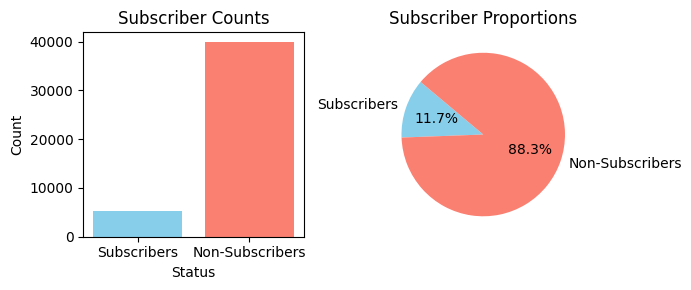

In [4]:
subscribers_count = 5289
non_subscribers_count = 39921
counts = [subscribers_count, non_subscribers_count]
labels = ['Subscribers', 'Non-Subscribers']
colors = ['skyblue', 'salmon']

plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
plt.bar(labels, counts, color=colors)
plt.title('Subscriber Counts')
plt.xlabel('Status')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Subscriber Proportions')

plt.tight_layout()
plt.show()

Number of customers who decided to subscribe term deposit is significantly lower than number of customers who are not interested in term deposit.  the number of subscribers divided by the total number of contacted customers, is approximately 11.7% (5289 out of 44910)

### 2. Demographic Profile of Subscribers

##### 2.1 Age Analysis

In [5]:
# Age Descriptive Statistics
subscribers_age_stats = subscribers['age'].describe()
non_subscribers_age_stats = non_subscribers['age'].describe()

age_comparison_df = pd.DataFrame({'Subscribers': subscribers_age_stats, 
                              'Non-Subscribers': non_subscribers_age_stats})
print(age_comparison_df)

       Subscribers  Non-Subscribers
count  5289.000000     39921.000000
mean     41.670070        40.839007
std      13.497781        10.172789
min      18.000000        18.000000
25%      31.000000        33.000000
50%      38.000000        39.000000
75%      50.000000        48.000000
max      95.000000        95.000000


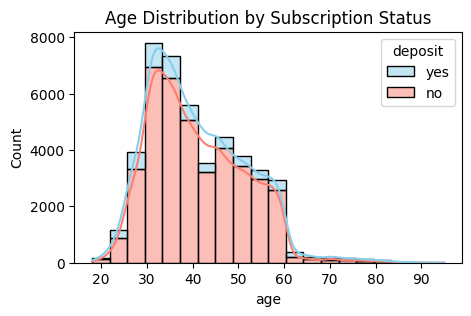

In [6]:
colors = {"yes": "skyblue", "no": "salmon"}

plt.figure(figsize=(5, 3))
sns.histplot(data=df, x='age', hue='deposit', multiple='stack', kde=True, bins=20, palette=colors)

plt.title('Age Distribution by Subscription Status')
plt.show()


It seems that the age distribution graph for both groups are quite similar, therefore age by itself may not be a strong predictor of whether someone will subscribe to a term deposit. We should look at other factors (like laon status, job type, or education) in combination with age to better understand and predict term deposit subscriptions.

##### 2.2 Education, Marital Status, and Job Category Analysis

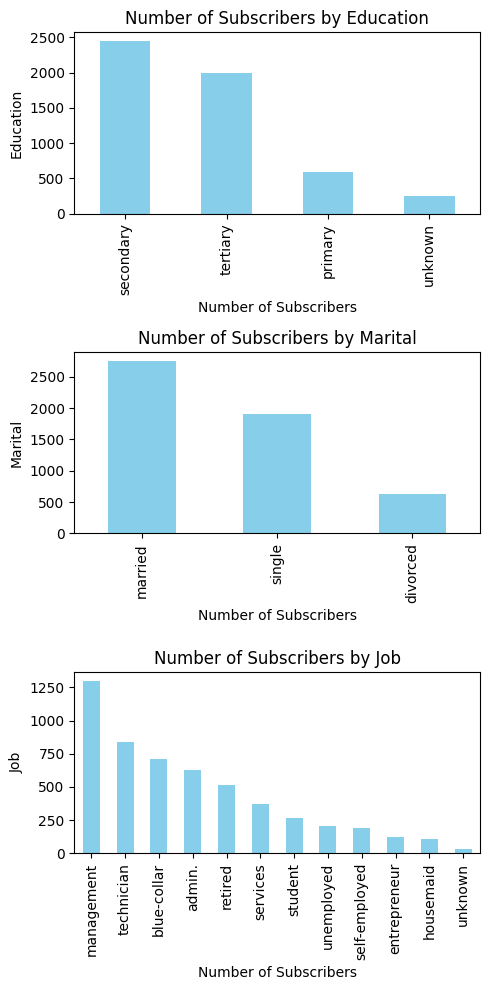

In [7]:

fig, axes = plt.subplots(3, 1, figsize=(5, 10))

categories = ['education', 'marital', 'job']
color = 'skyblue' 

for i, category in enumerate(categories):
    
    subscribers = df[df['deposit'] == 'yes']
    category_counts = subscribers[category].value_counts().sort_values(ascending=False)

    category_counts.plot(kind='bar', color=color, ax=axes[i])

    axes[i].set_title(f'Number of Subscribers by {category.capitalize()}')
    axes[i].set_xlabel('Number of Subscribers')
    axes[i].set_ylabel(category.capitalize())

plt.tight_layout()
plt.show()


- Education: Most subscribers have secondary or tertiary education. This might suggest that those with higher education are more inclined to subscribe.

- Marital Status: The majority of subscribers are married, followed by singles, with divorced individuals subscribing the least. This could be influenced by the overall customer demographics or suggest different financial needs and priorities based on marital status.

- Job: The largest number of subscribers come from management, technician, and blue-collar jobs, likely reflecting the population size of these groups within the customer base. Targeted campaigns towards these groups may yield a higher number of subscribers due to their sheer size.

Let's look at the subscriptions rates relative to each group.

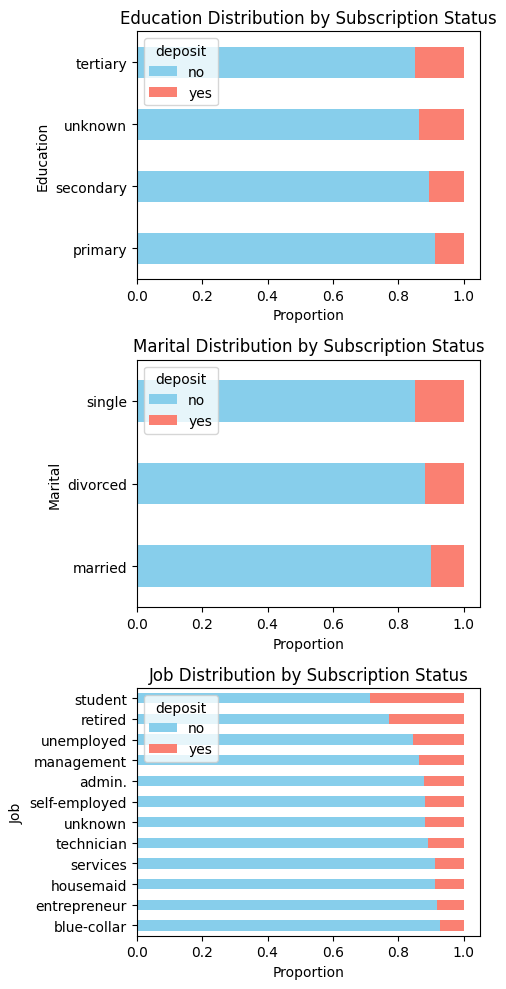

In [8]:
fig, axes = plt.subplots(3, 1, figsize=(5, 10))
categories = ['education', 'marital', 'job']
colors = {'yes': 'skyblue', 'no': 'salmon'}

for i, category in enumerate(categories):
    category_group = df.groupby(category)['deposit'].value_counts(normalize=True).unstack().fillna(0)
    for status in ['yes', 'no']:
        if status not in category_group:
            category_group[status] = 0

    category_group = category_group.sort_values(by='yes', ascending=False)
    category_group.plot(kind='barh', stacked=True, color=[colors['yes'], colors['no']], ax=axes[i])
    
    axes[i].set_title(f'{category.capitalize()} Distribution by Subscription Status')
    axes[i].set_xlabel('Proportion')
    axes[i].set_ylabel(category.capitalize())
    axes[i].invert_yaxis() 

plt.tight_layout()
plt.show()

- Education: The proportion of subscribers is relatively similar across different education levels, though it seems slightly higher for those with tertiary education. This suggests that education level alone may not be a strong differentiator in subscription rates.

- Marital Status: Single individuals show a higher proportion of subscriptions compared to married or divorced individuals. This could indicate that single customers are a better target for marketing campaigns for subscriptions.

- Job: Students and retired individuals have a higher proportion of subscriptions compared to other jobs, possibly reflecting more free time or a higher interest in financial planning among these groups.

Choosing where the bank should focus its efforts depends on its strategic goals. If the goal is to maximize the number of new subscribers, focusing on occupations with the highest absolute number of subscribers like 'management' and 'blue-collar' could be more fruitful due to the larger pool of potential customers.

However, if the bank aims to achieve a high conversion rate and perhaps build long-term relationships with customers who have a higher likelihood of subscribing, then targeting 'students' and 'retired' individuals may be more effective, as they show a higher proportional subscription rate.

##### 2.3 Cross-Analysis Between Demographic and Financial Data

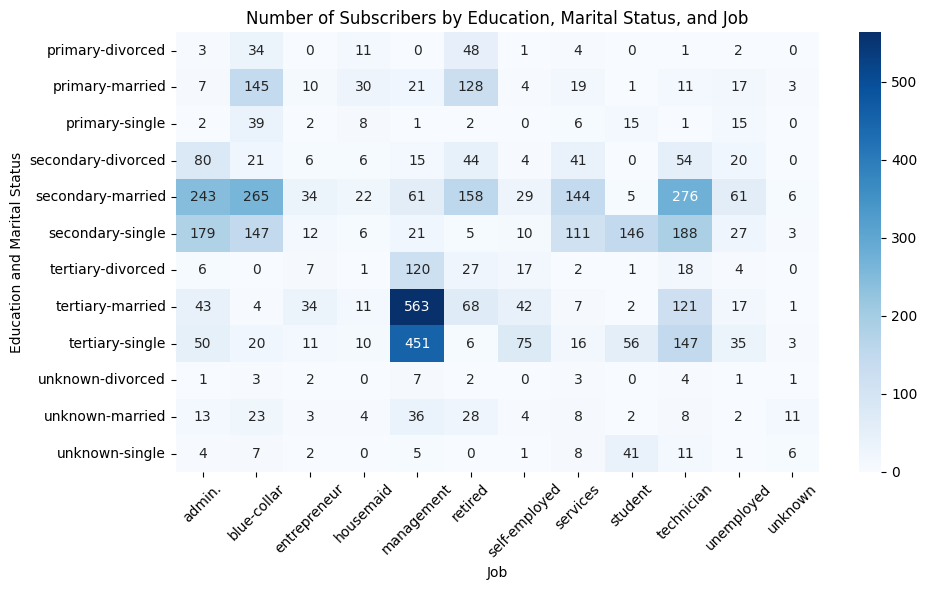

In [9]:
pivot_table_counts = pd.pivot_table(df[df['deposit'] == 'yes'], values='age', 
                                    index=['education', 'marital'], 
                                    columns='job', 
                                    aggfunc='count', 
                                    fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_counts, annot=True, cmap='Blues', fmt="d")
plt.title('Number of Subscribers by Education, Marital Status, and Job')
plt.ylabel('Education and Marital Status')
plt.xlabel('Job')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Education and Marital Status: Married individuals with secondary education form the largest group of subscribers, suggesting that the bank's term deposit is quite popular among this demographic. Single individuals with tertiary education also represent a significant group of subscribers, indicating a successful reach within this more educated and likely younger segment.

- Job Category: The 'management' job category, particularly those married with tertiary education, has a high number of subscribers, suggesting that professionals in this category may have more financial resources or interest in savings products.
The 'technician' and 'blue-collar' jobs also have a notable number of subscribers, especially among those with secondary education and married, indicating these jobs are potentially good targets for marketing campaigns.

- High Subscription in Certain Job-Education Combinations: Subscriptions are particularly high among married individuals in management and single individuals in tertiary education across several job categories. This might indicate that individuals in these segments are more financially stable or have a propensity to save and invest.
Lower Subscription Rates in Some Areas:

Certain combinations, such as divorced individuals with primary education in several job categories, have very few subscribers, which may require targeted outreach or different product offerings to increase engagement.

Potential Market Segments: The heatmap highlight potential market segments that could be targeted more aggressively or nurtured for growth, such as single tertiary-educated individuals across various jobs.

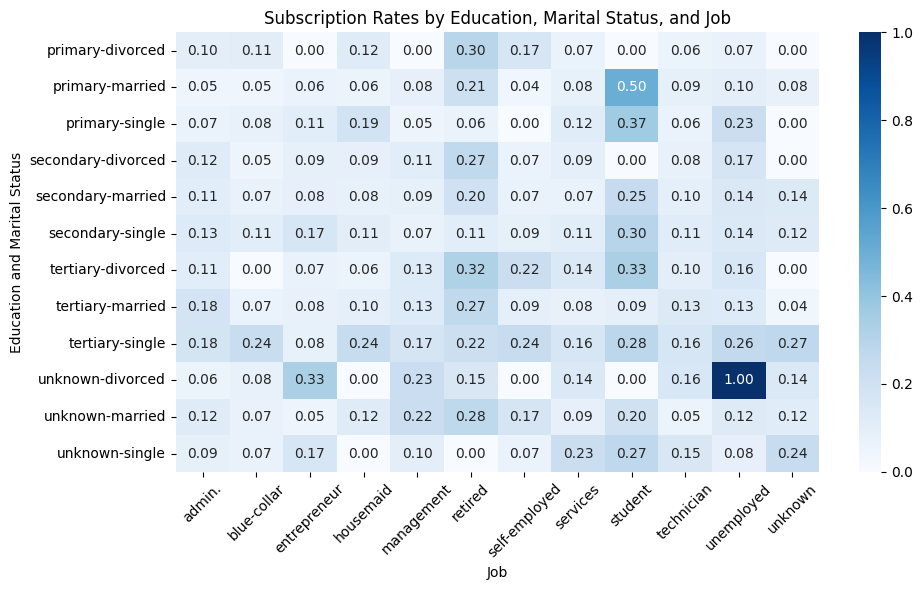

In [10]:
pivot_table = pd.pivot_table(df, values='age', 
                             index=['education', 'marital', 'job'], 
                             columns='deposit', 
                             aggfunc='size', 
                             fill_value=0)

pivot_table['subscription_rate'] = pivot_table['yes'] / (pivot_table['yes'] + pivot_table['no'])

pivot_table_reset = pivot_table.reset_index()

heatmap_data = pivot_table_reset.pivot_table(index=['education', 'marital'], 
                                             columns='job', 
                                             values='subscription_rate')

plt.figure(figsize=(10, 6))  
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt=".2f")
plt.title('Subscription Rates by Education, Marital Status, and Job')
plt.ylabel('Education and Marital Status')
plt.xlabel('Job')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

High Subscription Rates in Specific Segments: Certain segments like 'primary-married-admin.', 'tertiary-single-student', and 'unknown-divorced-management' show relatively high subscription rates. These areas could be key targets for focused marketing campaigns.

Variation Across Jobs: The subscription rate varies considerably across different jobs within the same education and marital status categories. For example, married individuals with a tertiary education level show different rates depending on their job, with 'management' having a higher subscription rate compared to other jobs.

Educational Impact: Higher education levels tend to correlate with higher subscription rates in some marital statuses, particularly for single individuals.

Potential Data Gaps: Some combinations, such as 'tertiary-divorced-entrepreneur', have no data, which could be due to a lack of customers in that segment or missing data.

### 3. Financial Characteristics of Subscribers

In [11]:
# Balance Descriptive Statistics
subscribers_balance_stats = subscribers['balance'].describe()
non_subscribers_balance_stats = non_subscribers['balance'].describe()

comparison_df = pd.DataFrame({'Subscribers': subscribers_balance_stats, 
                              'Non-Subscribers': non_subscribers_balance_stats})
print(comparison_df)

        Subscribers  Non-Subscribers
count   5289.000000     39921.000000
mean    1804.267915      1303.734025
std     3501.104777      2974.230288
min    -3058.000000     -8019.000000
25%      210.000000        58.000000
50%      733.000000       417.000000
75%     2159.000000      1345.000000
max    81204.000000    102127.000000


- Subscribers have a higher average bank balance compared to non-subscribers, indicating that those with higher balances are more likely to subscribe.
- The standard deviation(std) for subscribers is larger, suggesting a wider range of balances among this group. This could mean that while higher balances are common among subscribers, there is also a segment of subscribers with lower balances.



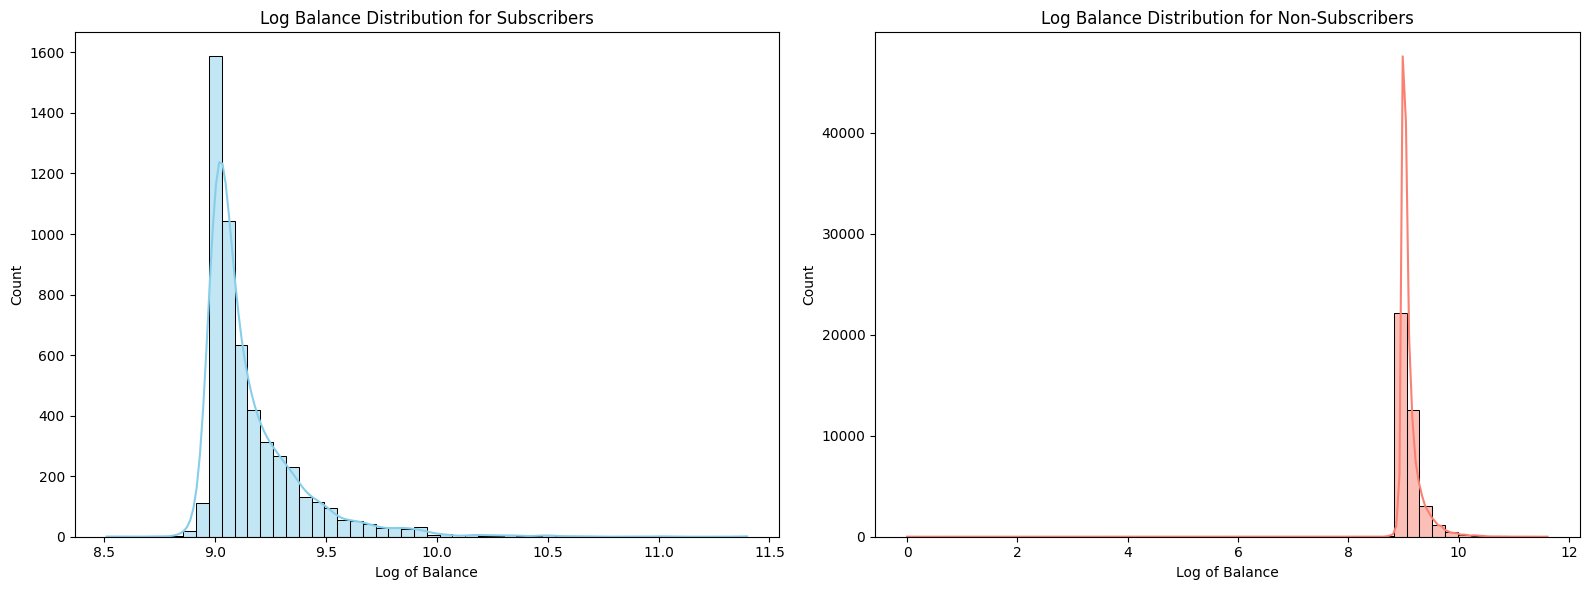

In [12]:
df['log_balance'] = np.log(df['balance'] + 8020)

# Define the figure size and setup the subplots
plt.figure(figsize=(16, 6))

# Histogram for subscribers
plt.subplot(1, 2, 1)
sns.histplot(df[df['deposit'] == 'yes']['log_balance'], bins=50, color='skyblue', kde=True)
plt.title('Log Balance Distribution for Subscribers')
plt.xlabel('Log of Balance')
plt.ylabel('Count')

# Histogram for non-subscribers
plt.subplot(1, 2, 2)
sns.histplot(df[df['deposit'] == 'no']['log_balance'], bins=50, color='salmon', kde=True)
plt.title('Log Balance Distribution for Non-Subscribers')
plt.xlabel('Log of Balance')
plt.ylabel('Count')

# Show the plots
plt.tight_layout()
plt.show()

- Subscribers tend to have a higher average balance when compared to non-subscribers, as indicated by the more right-skewed distribution of the subscribers' histogram.
- The peak of the subscribers' histogram is shifted to the right, suggesting that within the group of subscribers, a higher log balance is more common.
- Non-subscribers have a peak that is less to the right, indicating a lower average balance, and the distribution is more concentrated, implying less variation in balance amounts among non-subscribers compared to subscribers.



These observations suggest that having a higher balance may be associated with a higher likelihood of subscribing. 

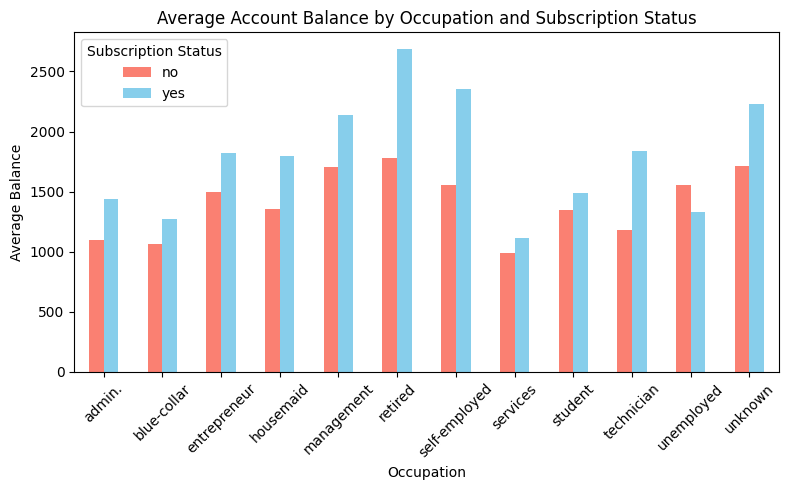

In [13]:
color = {'yes': 'skyblue', 'no': 'salmon'}
average_balances = df.groupby(['job', 'deposit'])['balance'].mean().unstack()

# Plot the average balances across all jobs using a bar chart
average_balances.plot(kind='bar', figsize=(8, 5),color=color)
plt.title('Average Account Balance by Occupation and Subscription Status')
plt.xlabel('Occupation')
plt.ylabel('Average Balance')
plt.xticks(rotation=45)
plt.legend(title='Subscription Status')
plt.tight_layout()  # Adjust layout for better readability
plt.show()

The graph does not show a clear trend that suggests a strong relationship between occupation type, account balance, and the likelihood of subscribing.

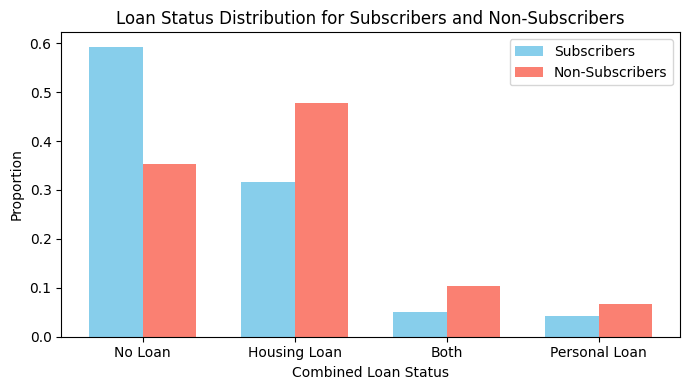

In [466]:
def determine_loan_category(row):
    if row['loan'] == 'no' and row['housing'] == 'no':
        return 'No Loan'
    elif row['loan'] == 'yes' and row['housing'] == 'no':
        return 'Personal Loan'
    elif row['loan'] == 'no' and row['housing'] == 'yes':
        return 'Housing Loan'
    elif row['loan'] == 'yes' and row['housing'] == 'yes':
        return 'Both'

df['combined_loan_status'] = df.apply(determine_loan_category, axis=1)

# Ensure subscribers and non_subscribers are defined properly
subscribers = df[df['deposit'] == 'yes']
non_subscribers = df[df['deposit'] == 'no']

# Use value_counts to get counts for each category and then normalize
loan_status_sub = subscribers['combined_loan_status'].value_counts(normalize=True)
loan_status_non_sub = non_subscribers['combined_loan_status'].value_counts(normalize=True)

# Reindex one series based on the other to ensure they have the same categories
loan_status_non_sub = loan_status_non_sub.reindex(loan_status_sub.index, fill_value=0)

# Set the positions of the bars on the x-axis
index = np.arange(len(loan_status_sub))
bar_width = 0.35

# Plotting
plt.figure(figsize=(7, 4))
plt.bar(index, loan_status_sub.values, bar_width, color='skyblue', label='Subscribers')
plt.bar(index + bar_width, loan_status_non_sub.values, bar_width, color='salmon', label='Non-Subscribers')
plt.xlabel('Combined Loan Status')
plt.ylabel('Proportion')
plt.title('Loan Status Distribution for Subscribers and Non-Subscribers')
plt.xticks(index + bar_width / 2, loan_status_sub.index)
plt.legend()

plt.tight_layout()
plt.show()

- A higher proportion of subscribers seem to have no loans compared to non-subscribers.
- Non-subscribers have a greater proportion with housing loans.
- The distribution for both personal loans and those having both loans is relatively smaller and appears similar between subscribers and non-subscribers.

This could indicate that individuals without any loans are more inclined to subscribe, possibly due to having more disposable income or less financial strain. Conversely, those with housing loans might be less likely to subscribe, which could be a factor of financial commitment associated with housing loans reducing the capacity for additional financial products.

### 4. Campaign Engagement Analysis

#### 4.1 Contact Method

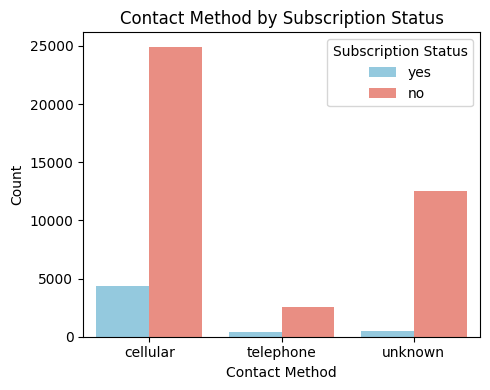

In [467]:
contact_order = ['cellular', 'telephone', 'unknown']

plt.figure(figsize=(5, 4))
sns.countplot(x='contact', hue='deposit', data=df, order=contact_order, palette=['skyblue', 'salmon'])

plt.title('Contact Method by Subscription Status')
plt.xlabel('Contact Method')
plt.ylabel('Count')
plt.legend(title='Subscription Status')
plt.tight_layout() 
plt.show()

- Most of contacts are made by cellular method.

#### 4.2 Customer Engagement **During** This Campaign Analysis

##### 4.2.1 Descriptive and Average Number of Contacts Performed During This Campaign

Descriptive Statistics for Contacts During This Campaign:
count    45210.000000
mean         2.763858
std          3.098053
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64


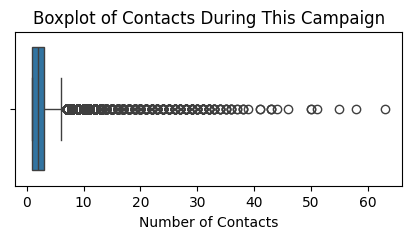

In [468]:
# Descriptive Statistics
print("Descriptive Statistics for Contacts During This Campaign:")
print(df['campaign'].describe())

# Boxplot
plt.figure(figsize=(5, 2))
sns.boxplot(x=df['campaign'])
plt.title('Boxplot of Contacts During This Campaign')
plt.xlabel('Number of Contacts')
plt.show()

- The mean is approximately 2.76, indicating that customers were contacted just under three times on average during the campaign.

- The median is 2, indicating that half of the customers were contacted twice or fewer times. This suggests that two contacts might be a common strategy for the campaign.

- The 75% percentile is 3, showing that 75% of customers received three or fewer contacts.

- The max value is 63, which is far above the mean, indicating that there are significant outliers where a small number of customers received many more contacts.These high number of contacts might indicate that there were some instances where the campaign excessively contacted certain individuals. This could be inefficient and might suggest a need to review the campaign strategy to avoid over-contacting, which could lead to potential customer dissatisfaction.

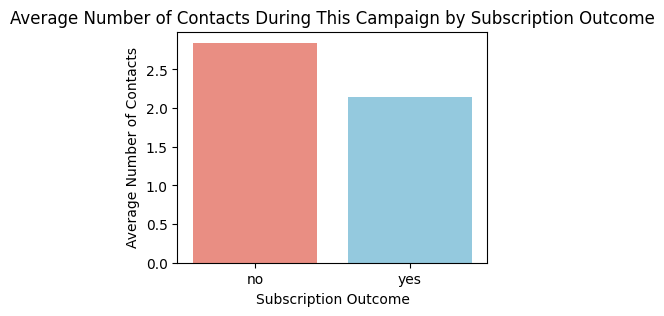

In [469]:
# Average Number of Contacts by Subscription Outcome
avg_contacts_by_subscription = df.groupby('deposit')['campaign'].mean().reset_index()

custom_palette = {'yes': 'skyblue', 'no': 'salmon'}

plt.figure(figsize=(4,3))
sns.barplot(x='deposit', y='campaign', hue= 'deposit',data=avg_contacts_by_subscription, palette=custom_palette)
plt.title('Average Number of Contacts During This Campaign by Subscription Outcome')
plt.xlabel('Subscription Outcome')
plt.ylabel('Average Number of Contacts')
plt.show()

- The average number of contacts for those who did not subscribe ('no') is higher than for those who did subscribe ('yes'). 
- This raises questions about the efficiency of the contact strategy. It might imply that a certain threshold of contact attempts might be optimal, beyond which additional contacts do not increase the likelihood of subscription.


##### 4.2.2 Contact Frequency and Subscription Outcome Analysis

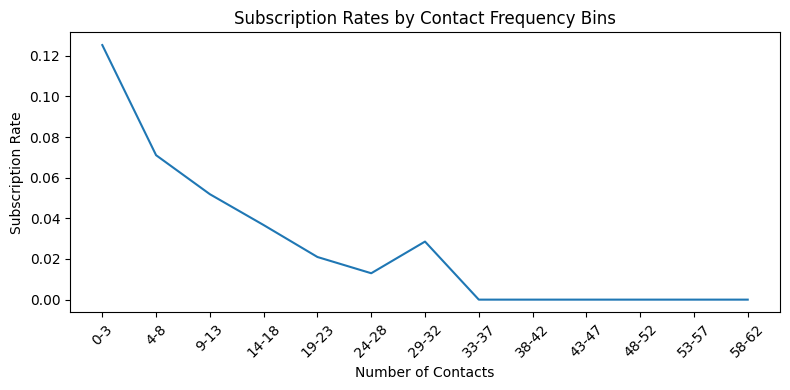

In [470]:
bins = np.linspace(0, 63, num=14)
labels = [f'{int(left)}-{int(right)-1}' for left, right in zip(bins[:-1], bins[1:])]
df['campaign_bin'] = pd.cut(df['campaign'], bins=bins, labels=labels, include_lowest=True)

df['subscription'] = df['deposit'].apply(lambda x: 1 if x == 'yes' else 0)
contact_subscription_rate = df.groupby('campaign_bin', observed=True)['subscription'].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.lineplot(data=contact_subscription_rate, x='campaign_bin', y='subscription')
plt.title('Subscription Rates by Contact Frequency Bins')
plt.xlabel('Number of Contacts')
plt.ylabel('Subscription Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- There is a clear downward trend in subscription rates as the number of contacts increases. This suggests that as customers are contacted more frequently, the likelihood of them subscribing decreases.

- The highest subscription rate is observed at the lowest contact frequency (0-3 contacts), indicating that fewer contacts might be more effective in achieving subscriptions.

##### 4.2.3 Timing of Contact Analysis

##### Day of Contact and Subscription
Determine if the day of the last contact (e.g., beginning of the month vs. mid vs. end) influences a customer's decision to subscribe. 
<br>First, we categorize the days into 'Early Month' (1st to 10th), 'Mid Month' (11th to 20th), and 'Late Month' (21st to end of the month). Then, we'll calculate the subscription rates for these three time frames.

In [471]:
def categorize_day(day):
    if day <= 10:
        return 'Early Month'
    elif day <= 20:
        return 'Mid Month'
    else:
        return 'Late Month'

df['Timeframe'] = df['day'].apply(categorize_day)

timeframe_counts = df.groupby(['Timeframe', 'deposit']).size().unstack(fill_value=0)

timeframe_counts['Total'] = timeframe_counts.sum(axis=1)
timeframe_counts['Subscribed_Rate'] = timeframe_counts['yes'] / timeframe_counts['Total']
timeframe_counts['Non_Subscribed_Rate'] = timeframe_counts['no'] / timeframe_counts['Total']

print(timeframe_counts[['Subscribed_Rate', 'Non_Subscribed_Rate']])

deposit      Subscribed_Rate  Non_Subscribed_Rate
Timeframe                                        
Early Month         0.126348             0.873652
Late Month          0.116897             0.883103
Mid Month           0.110066             0.889934


It seems that the beginning of the month has a slightly higher subscription rate compared to the middle and the end of the month. However, the differences are not very large, let's compare the subscription rate in period of month and month.

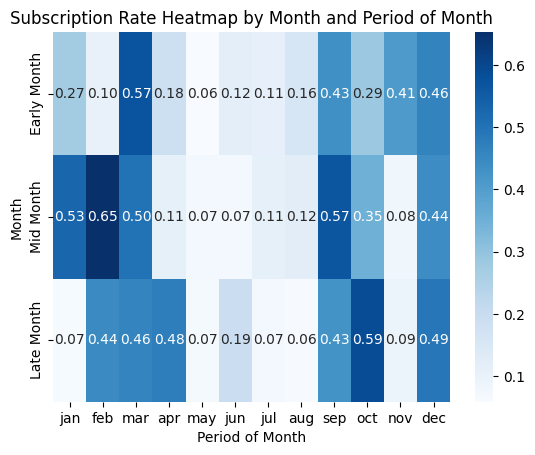

In [472]:
df['period_of_month'] = df['day'].apply(categorize_day)

subscription_rate = df.groupby(['month', 'period_of_month'])['deposit'].apply(lambda x: (x == 'yes').mean()).reset_index(name='subscription_rate')

period_order = ['Early Month', 'Mid Month', 'Late Month']
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

subscription_rate['period_of_month'] = pd.Categorical(subscription_rate['period_of_month'], categories=period_order, ordered=True)
subscription_rate['month'] = pd.Categorical(subscription_rate['month'], categories=month_order, ordered=True)

heatmap_data = subscription_rate.pivot(index='period_of_month', columns='month', values='subscription_rate')

sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt=".2f")
plt.title('Subscription Rate Heatmap by Month and Period of Month')
plt.ylabel('Month')
plt.xlabel('Period of Month')
plt.show()

- The heatmap shows that not all times of the month are equally efficient for subscriptions. For instance, in Febuary, the mid-month period has a very high subscription rate (0.65), suggesting that concentrating contact efforts during this period could yield better results.
- There may be a need to realign marketing strategies according to these insights. For example, the number of contacts could be increased during high-efficiency periods, as indicated by the heatmap, to maximize the total number of subscriptions.

If this trend is consistent with a larger dataset, the bank may consider concentrating more marketing efforts in the early part of the month when people might be more receptive to opening new term deposits. However, it's important to conduct further analysis, ideally with more data, to confirm these findings and to control for other variables that might influence the subscription rate.

##### Month of Contact and Subscription
Determine if the time of year affects subscription rates. Are certain months more effective for term deposit campaigns?

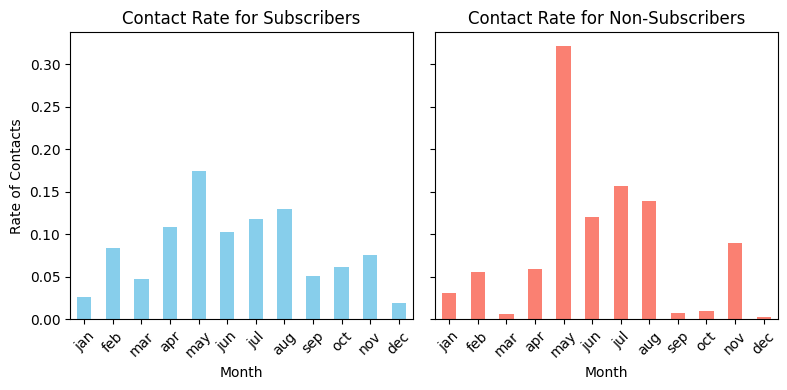

In [473]:
colors = {'yes': 'skyblue', 'no': 'salmon'}

months_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

# Calculate the rate of subscribers and non-subscribers for each month
sub_rate_by_month = df[df['deposit'] == 'yes']['month'].value_counts(normalize=True).loc[months_order]
non_sub_rate_by_month = df[df['deposit'] == 'no']['month'].value_counts(normalize=True).loc[months_order]

# Plot the rates for subscribers
sub_rate_by_month.plot(kind='bar', ax=axes[0], color=colors['yes'])
axes[0].set_title('Contact Rate for Subscribers')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Rate of Contacts')
axes[0].set_xticklabels(months_order, rotation=45)

# Plot the rates for non-subscribers
non_sub_rate_by_month.plot(kind='bar', ax=axes[1], color=colors['no'])
axes[1].set_title('Contact Rate for Non-Subscribers')
axes[1].set_xlabel('Month')
axes[1].set_xticklabels(months_order, rotation=45)

plt.tight_layout()
plt.show()

- There is a noticeable peak in contact rates in May. Why May?
- For subscribers, high contact rates are distributed during the mid-year.

Calculate the proportion of 'yes' responses (subscribers) within each month compared to the total number of contacts made that month

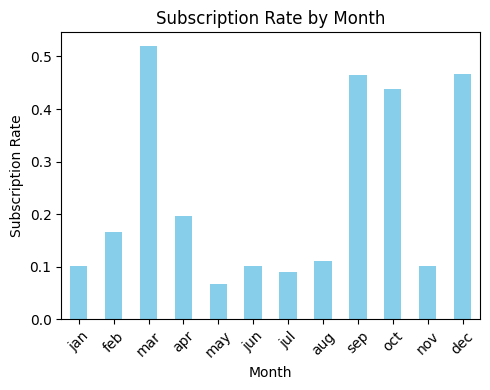

In [474]:
subscription_rates = df.groupby('month')['deposit'].value_counts(normalize=True).unstack('deposit').fillna(0)

subscription_rates = subscription_rates.reindex(months_order)

fig, ax = plt.subplots(figsize=(5, 4))

subscription_rates['yes'].plot(kind='bar', color='skyblue', ax=ax)

ax.set_title('Subscription Rate by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Subscription Rate')
ax.set_xticklabels(subscription_rates.index, rotation=45)

plt.tight_layout()
plt.show()

- There is a significant peak in December and a notable low in May, indicating that while many contacts might occur in May, they result in a lower subscription rate.
- High subscription rates in March, September, October and December suggest that these may be effective months for term deposit campaigns.

#### Stragetic Implications:
There appears to be a seasonal trend where subscription rates are higher at the end of the year (December) and towards the end of the first quarter (March). This could align with financial planning times such as the end of the fiscal year or tax season when individuals may be more inclined to consider term deposits.


#### 4.2.4 Contact Duration Analysis
Examine the relationship between the duration of contacts and subscription outcomes.

In [475]:
# Contact Duration Descriptive Statistics
subscribers_duration_stats = subscribers['duration'].describe()
non_subscribers_duration_stats = non_subscribers['duration'].describe()
both_duration_stats = df['duration'].describe()

comparison_df = pd.DataFrame({'Subscribers': subscribers_duration_stats, 
                              'Non-Subscribers': non_subscribers_duration_stats,'Both':both_duration_stats})
print(comparison_df)

       Subscribers  Non-Subscribers          Both
count  5289.000000     39921.000000  45210.000000
mean    537.294574       221.179605    258.161071
std     392.525262       207.384848    257.530306
min       8.000000         0.000000      0.000000
25%     244.000000        95.000000    103.000000
50%     426.000000       164.000000    180.000000
75%     725.000000       279.000000    319.000000
max    3881.000000      4918.000000   4918.000000


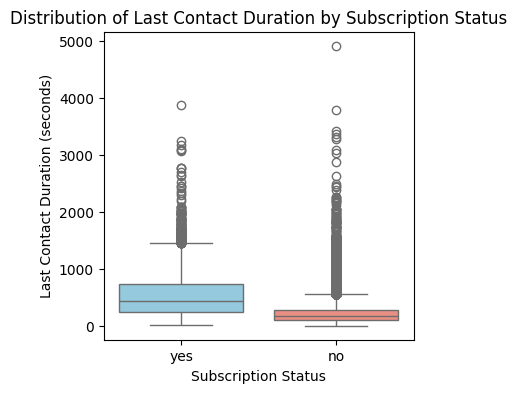

In [476]:
plt.figure(figsize=(4, 4))
sns.boxplot(x='deposit', y='duration',hue='deposit', data=df,legend=False, palette=['skyblue', 'salmon'])

plt.title('Distribution of Last Contact Duration by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Last Contact Duration (seconds)')

plt.show()

- It seems that the median duration for the 'yes' group is higher than for the 'no' group. This suggests that successful subscriptions (where customers said 'yes') tend to have longer call durations on average.

#### 4.2.5 Number of Days Since Last Contact and Subscription Outcomes Analysis

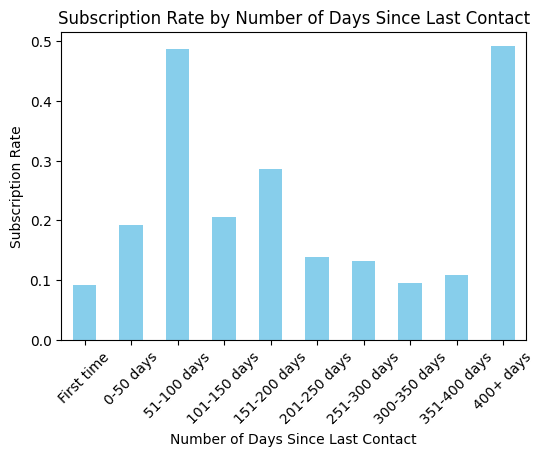

In [477]:
bins = [-1,0, 50, 100, 150, 200, 250, 300, 350 , 400, float('inf')]
labels = ['First time','0-50 days', '51-100 days', '101-150 days','151-200 days', '201-250 days','251-300 days', '300-350 days', '351-400 days', '400+ days']
df['pdays_bins'] = pd.cut(df['pdays'], bins=bins, labels=labels, right=False)

# Calculate the subscription rate by 'pdays_bins'
# We convert 'yes'/'no' to 1/0 to calculate the mean as a rate
df['subscription'] = df['deposit'].apply(lambda x: 1 if x == 'yes' else 0)
subscription_rate_by_pdays = df.groupby('pdays_bins', observed=True)['subscription'].mean()

# Plotting
plt.figure(figsize=(6, 4))
subscription_rate_by_pdays.plot(kind='bar', color='skyblue')
plt.title('Subscription Rate by Number of Days Since Last Contact')
plt.xlabel('Number of Days Since Last Contact')
plt.ylabel('Subscription Rate')
plt.xticks(rotation=45)
plt.show()

- The initial peak at 51-100 days since the last contact implies that there may be an optimal period after a previous campaign where customers are more likely to subscribe. This suggests that following up within 1 to 3 months of the last campaign could be beneficial.

- There is a general trend where the subscription rate declines as the time since the last contact increases, particularly from 101 to 400 days. This could indicate that customers become less responsive the longer they are not contacted after a campaign.

- The sharp rise in subscription rate for customers contacted after more than 400 days suggests that there may be value in targeting customers from much older campaigns who have not been engaged in a long time. It could reflect a segment of customers who are receptive to re-engagement after a significant hiatus.



#### 4.3 Customer Engagement **Before** This Campaign Analysis

##### 4.3.1 Descriptive and Average Number of Contacts Performed Before This Campaign

In [478]:
print("Descriptive Statistics for Previous Contacts")
print(df['previous'].describe())

Descriptive Statistics for Previous Contacts
count    45210.000000
mean         0.574253
std          1.907928
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         58.000000
Name: previous, dtype: float64


-  The mean is approximately 0.57, indicating that, on average, customers were contacted less than once before this campaign.

- The std is about 1.91, which is relatively high compared to the mean. There is a significant variability in the number of previous contacts among customers.

- The min, 25%, 50%, and 75% percentiles are all 0, meaning at least 75% of customers had no previous contact before this campaign which means low pre-campaign engagement.

- There are high-contact outliers. The max value is 58, showing that at least  indicating there are ouone customer was contacted 58 times. (Is this possible?)

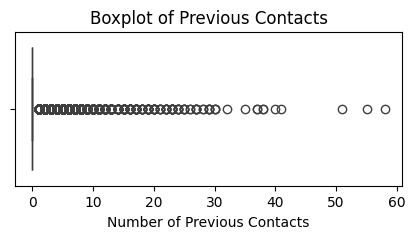

In [479]:
# Boxplot
plt.figure(figsize=(5, 2))
sns.boxplot(x=df['previous'])
plt.title('Boxplot of Previous Contacts')
plt.xlabel('Number of Previous Contacts')
plt.show()

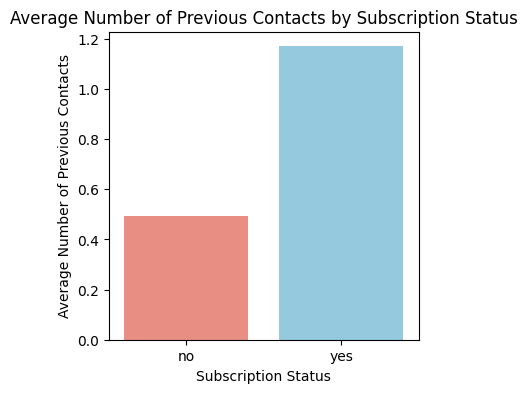

In [480]:
colors = {'yes': 'skyblue', 'no': 'salmon'}
avg_contacts_by_subscription = df.groupby('deposit')['previous'].mean().reset_index()
plt.figure(figsize=(4, 4))
sns.barplot(x='deposit', y='previous', data=avg_contacts_by_subscription,hue='deposit', palette=colors)
plt.title('Average Number of Previous Contacts by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Average Number of Previous Contacts')
plt.show()

- Customers who subscribed ('yes') had, on average, more previous contacts than those who did not subscribe ('no'). This suggests that repeated contact may be an important factor in converting leads into subscribers.

- The difference in the average number of previous contacts between the two groups is significant, as indicated by the height of the bars. It could imply that persistence in contacting customers is effective to a degree.

##### 4.3.2 Contact Freqency in Previous and Current Subscription Outcome Analysis

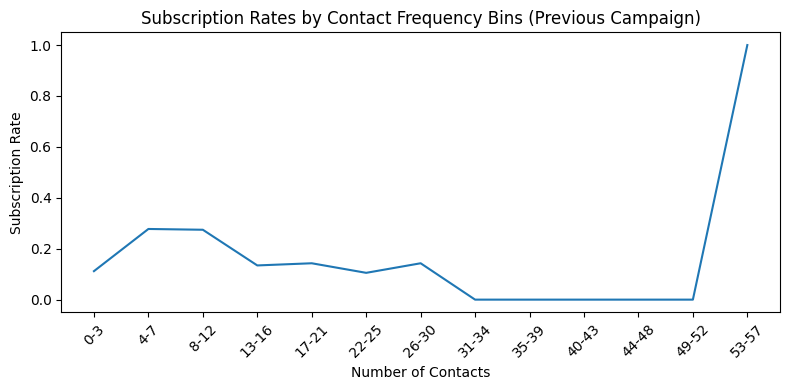

In [481]:
bins = np.linspace(0, 58, num=14)
labels = [f'{int(left)}-{int(right)-1}' for left, right in zip(bins[:-1], bins[1:])]
df['previous_bin'] = pd.cut(df['previous'], bins=bins, labels=labels, include_lowest=True)

df['subscription'] = df['deposit'].apply(lambda x: 1 if x == 'yes' else 0)
contact_subscription_rate = df.groupby('previous_bin', observed=True)['subscription'].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.lineplot(data=contact_subscription_rate, x='previous_bin', y='subscription')
plt.title('Subscription Rates by Contact Frequency Bins (Previous Campaign)')
plt.xlabel('Number of Contacts')
plt.ylabel('Subscription Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- The subscription rate increases as the number of previous contacts grows from 0 to 5.

- There is a dip in the subscription rate for individuals contacted between 6 and 30 times, suggesting possible over-contacting or diminishing returns after a certain point.

- There are customers who have been contact for more than 40 times and resulted in successful subscription. This could indicate that extremely persistent contact strategy might works. However, this represents only a small group of customers and it might reflect an outlier in the data.


### 4.４ Previous Campaign Outcome and This Campaign Outcome

Calculate the proportions of the number of customers who subscribed in the current campaign by the total number of customers for each previous campaign outcome category.

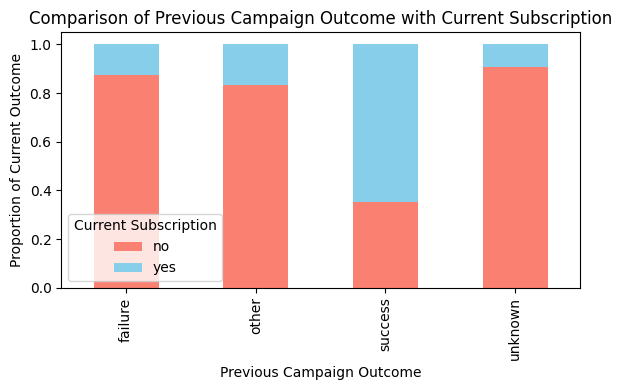

In [482]:
colors = {'yes': 'skyblue', 'no': 'salmon'}

outcome_comparison = pd.crosstab(df['poutcome'], df['deposit'])
outcome_comparison_normalized = outcome_comparison.div(outcome_comparison.sum(axis=1), axis=0)

outcome_comparison_normalized.plot(kind='bar', stacked=True,figsize=(6, 4), color=colors)
plt.title('Comparison of Previous Campaign Outcome with Current Subscription')
plt.xlabel('Previous Campaign Outcome')
plt.ylabel('Proportion of Current Outcome')
plt.legend(title='Current Subscription')
plt.tight_layout()
plt.show()

- Customers who had a 'success' outcome in the previous campaign is likely to continue subscription.
- 'failure', 'other' and 'unknown' outcome in the previous campaign have a lower proportion of current subscriptions. This could indicate that the previous interactions did not resonate well with the customers, leading to lower conversion rates in the current campaign.